# TUTORIAL <span style="color:orange;">***MASAÏ***</span><img width='64' style="float:right;margin:0 10px 0 20px;" src="images/masai.png" />

Back to the main [Index](Index.ipynb)

## Part 8. 2D EXSY processing

#### Various imports and graphics settings

In [1]:
from __future__ import print_function, division

#### Loading the <span style="color:orange;">***MASAÏ***</span> library

In [2]:
from masai.api import *

MASAI api loaded: version 0.2.6.2

The current directory is </Users/christian/Dropbox/D.PROGRAMMES/masai/doc/tutorial>
MASAI root directory is </Users/christian/Dropbox/D.PROGRAMMES/masai>


#### Set up the general location of data

In [3]:
import os
# You should set the MASAI environnement variable before running these exemples')
# or change the two following paths according to your installation
DATADIR = os.path.join(MASAI,'doc/tutorial/exemples')
FIGDIR = os.path.join(MASAI,'doc/tutorial/figures')

## Load and plot a 2D fid

In [4]:
user = 'user'
name = 'EXSY'
expno = 451
path = os.path.join(DATADIR, user,'nmr',name, str(expno))
source = Bruker(path) 
source

***Bruker Source***
- path: /Users/christian/Dropbox/D.PROGRAMMES/masai/doc/tutorial/exemples/user/nmr/EXSY/451
- datatype: 2D NMR SER
- pulse program: noesyph
- Encoding: STATES
- TD1: 256, TD2: 6144
- F1 limits: 0.00 to 7.676 ms
- F2 limits: 0.00 to 369.809 ms

In [5]:
d8 = float(source.par.D[8])*1000.
print("D8 is the mixing time: %.2f ms"%d8)

D8 is the mixing time: 100.00 ms


## Process SER data

#### Process the first dimension

In [17]:
source = Bruker(path) 

# Make a broadening shifted to the TOP of echoes 
# **REMARKS:** This is possible in ``STATES`` mode only (TO CHECK!)

Process(source, transform = 'bc; em 2 --k_shifted 1 0')

# Zerofilling ( zf n : means n times TD)
Process(source, transform = 'zf 0') 

# FT
Process(source, transform = 'ft')

# clip the region of interest
# Process(source, transform = 'cl -10 120')

bc correction
Exponential apodization lb:2.00
Zero-filling to si:8192
Fourier transform with si:8192


Process
        Process a source

        Parameters
        ----------
        fd: source (such as NMR or IR source)
        transforms: str
            line(s) of commands among: em, zf, ft, pk, ab
            type Process(<command_name>) to get help on individual command

Manual phasing phc0:-15.00, phc1:0.00, pivot:82.00 
taking horizontal (axis=1) section by index at index 0


<IPython.core.display.Javascript object>


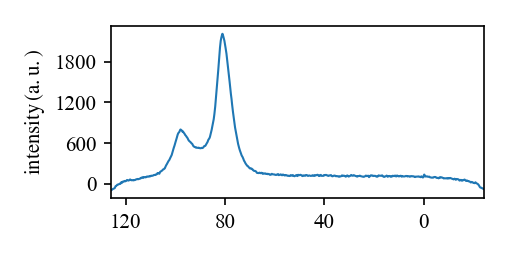

In [18]:
# Manually phasing and plot of the first row to check the phase
Process(source, transform = 'pk -15 0 --pivot 82')
row = source.get_row(0, byindex=True)
p_1 = Plot1d(row, reverse=True)

<IPython.core.display.Javascript object>


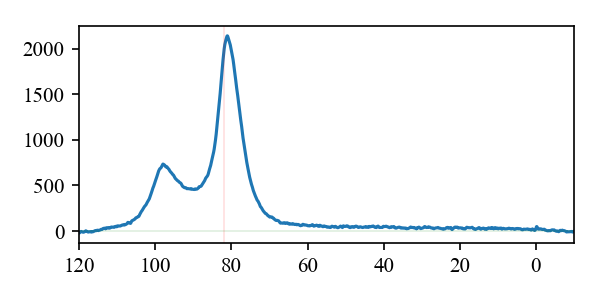

ph0: -15.0  ph1: 0.0  pivot: 82.0 (PHC0: -15.0
WARNING THESE PHASE VALUES ARE NOT STORED IN THE SOURCE!
So you must use them in another `pk` command)


In [8]:
proc = Process(source, transform = 'pk --interactive --pivot 82')

In [9]:
# Apply the above interactive phase 
proc.apply()

Manual phasing phc0:-15.00, phc1:0.00, pivot:82.00 


<IPython.core.display.Javascript object>


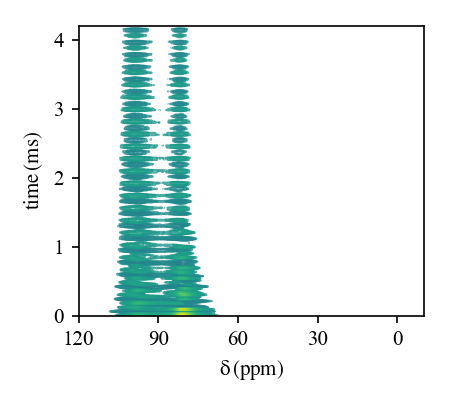

taking horizontal (axis=1) section by index at index 0


<IPython.core.display.Javascript object>


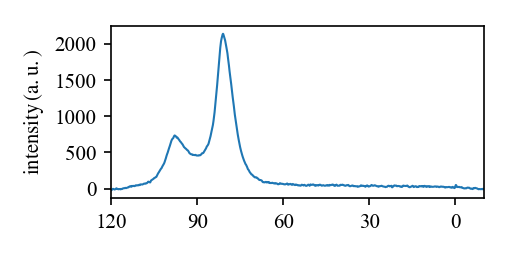

In [10]:
Plot2d(source, figsize=(3,2.7), ylim=(0,4.2))
row = source.get_row(0, byindex=True)
_ = Plot1d(row, reverse=True)

#### Process the second dimension

In [11]:
Process(source, axis=0, transform='em 10')
Process(source, axis=0, transform='zf 0') 
Process(source, axis=0, transform='ft')

Exponential apodization lb:10.00
Zero-filling to si:256
Data transformed according to encoding STATES
Fourier transform with si:256


Process
        Process a source

        Parameters
        ----------
        fd: source (such as NMR or IR source)
        transforms: str
            line(s) of commands among: em, zf, ft, pk, ab
            type Process(<command_name>) to get help on individual command

Manual phasing phc0:-65.00, phc1:-180.00, pivot:-0.40 
taking vertical (axis=0) section by position at 80.87


<IPython.core.display.Javascript object>


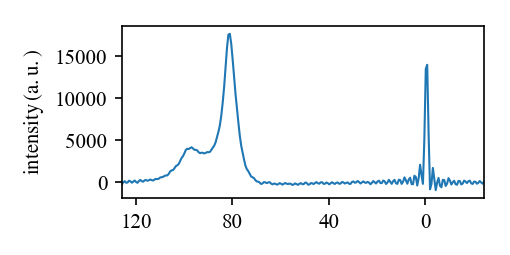

In [12]:
Process(source, axis=0, transform='pk -65 -180 --pivot -0.4') #manual phasinf first needed
row = source.get_col(80.88, width=0.)
p_1 = Plot1d(row, reverse=True)

<IPython.core.display.Javascript object>


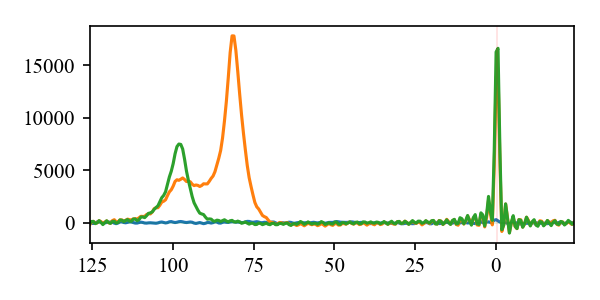

ph0: -65.0  ph1: -180.0  pivot: -0.4 (PHC0: -65.0
WARNING THESE PHASE VALUES ARE NOT STORED IN THE SOURCE!
So you must use them in another `pk` command)


In [13]:
proc2 = Process(source, axis=0, transform = 'pk --interactive -.7 81 97 --pivot -0.4')

In [14]:
# Apply the above interactive phase 
proc2.apply()

Manual phasing phc0:-65.00, phc1:-180.00, pivot:-0.40 


clipping along axis 0


<IPython.core.display.Javascript object>


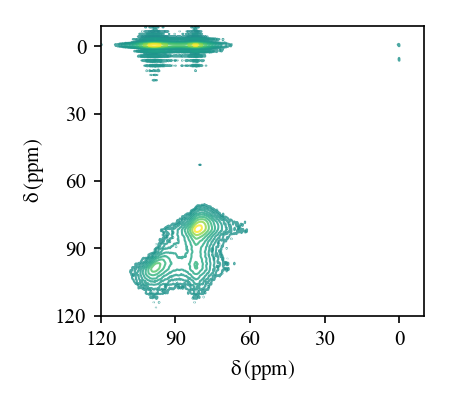

taking vertical (axis=0) section by position at 81.00


<IPython.core.display.Javascript object>


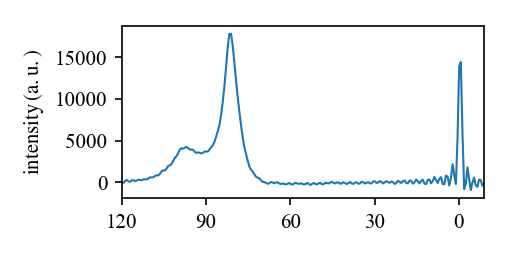

In [15]:
# display 2d
# clip the region of interest
Process(source, axis=0, transform = 'cl -10 120')

Plot2d(source, figsize=(3,2.7), exponent=1.5, nc=50)
row = source.get_col(81)
_ = Plot1d(row, reverse=True)

clipping along axis 0
(1024, 1024)


<IPython.core.display.Javascript object>


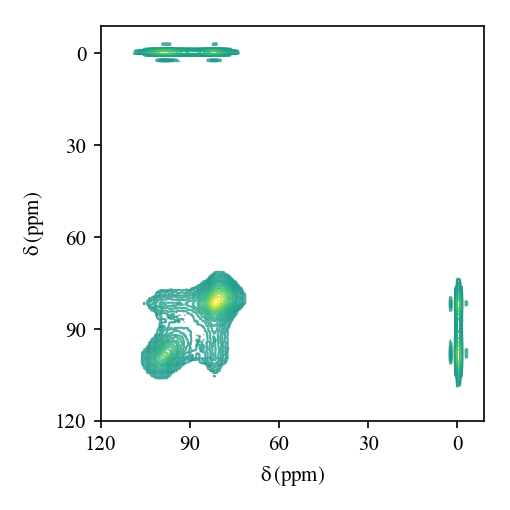

In [16]:
# symetrisation

data = source.data.copy()
index= np.linspace(max(min(data.index), min(data.columns)),min(max(data.index), max(data.columns)),1024)
data = data.reindex(index = index, columns = index, method='nearest')
backup = source.copy()
print(data.shape)
backup.data = data + data.T
Plot2d(backup)